Metrics: {'MSE': np.float64(1.1139477606515839e-29), 'MaxError': np.float64(2.55351295663786e-14)}


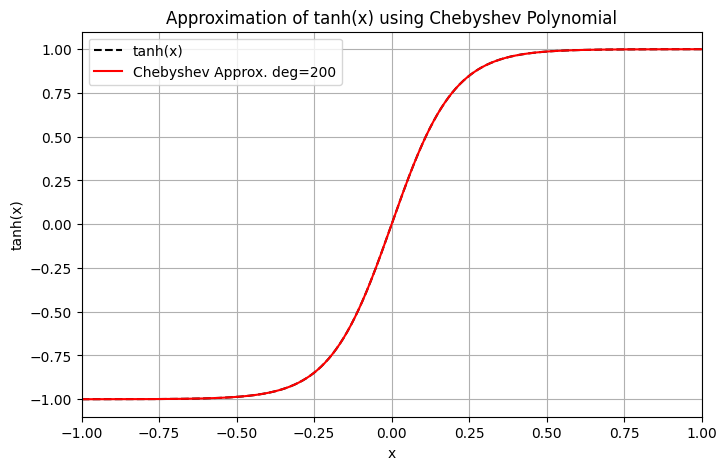

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

# Функция для вычисления метрик аппроксимации
def approximation_metrics(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    mse = np.mean(error**2)
    max_err = np.max(error)
    return {"MSE": mse, "MaxError": max_err}

# Параметры
degree = 200  # степень Chebyshev-полинома
interval = [-1, 1]  # интервал аппроксимации

def tanh_function(x, alpha=5):
    return np.tanh(alpha * x)

# Строим Chebyshev-полином, аппроксимирующий sign(x)
# np.polynomial.chebyshev.chebfit работает на [-1,1], поэтому нормализуем вход
x_fit = np.linspace(interval[0], interval[1], 1000)
y_fit = tanh_function(x_fit)

cheb_coeffs = Chebyshev.fit(x_fit, y_fit, deg=degree, domain=interval)
y_approx = cheb_coeffs(x_fit)

# Метрики
y_true = tanh_function(x_fit)
metrics = approximation_metrics(y_true, y_approx)
print(f"Metrics: {metrics}")

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(x_fit, y_true, label='tanh(x)', color='black', linestyle='--')
plt.plot(x_fit, y_approx, label=f'Chebyshev Approx. deg={degree}', color='red')
plt.title('Approximation of tanh(x) using Chebyshev Polynomial')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.xlim(-1, 1)
plt.legend()
plt.show()
